In [1]:
# load pandas untuk data wrangling
import pandas as pd
# load numpy untuk manipulasi vektor
import numpy as np
# load matplotlib untuk visualisasi data
import matplotlib.pyplot as plt
# load seaborn untuk visualisasi data
import seaborn as sns

# load metrics object dari sklearn
from sklearn import metrics
# load train-test data splitter
from sklearn.model_selection import train_test_split
# Import Decision Tree classifier (DT)
from sklearn.tree import DecisionTreeClassifier
# Import Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
# load SVM classifier model
from sklearn.svm import SVC
# load KNN classifier model
from sklearn.neighbors import KNeighborsClassifier

from scipy.stats import chi2_contingency, randint, uniform, ttest_ind
from scipy.stats.contingency import association

HEX_BLUE = '#48a8c4'
HEX_RED = '#c0504d'

from sklearn.preprocessing import (
  LabelEncoder,
  MinMaxScaler,
  OneHotEncoder,
  OrdinalEncoder,
)

from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
  PrecisionRecallDisplay,
  RocCurveDisplay,
)

from sklearn.model_selection import (
  cross_val_score,
  train_test_split,
  RandomizedSearchCV,
)

#import for metrics
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score

# Set the maximum number of columns and rows to display to a large number
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load dataset

memakai dataset dari : https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment/Assignment Extra Class 8 - Churn Analysis/Bank Customer Churn Prediction.csv')

In [4]:
df.head(3)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [5]:
df.shape

(10000, 12)

## Check Missing Value

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [7]:
df.head(1)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [8]:
df.isna().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


There is no missing value

## Check Duplicates

In [9]:
df.duplicated().sum()

np.int64(0)

There is no duplicates value

## Check Outliers

In [10]:
import scipy.stats as stats

def check_plot(df, variable):

    plt.figure(figsize=(16, 4))

    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30, kde=True)
    plt.title('Histogram')

    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    plt.subplot(1, 3, 3)
    sns.boxplot(x=df[variable])
    plt.title('Boxplot')


    plt.show()

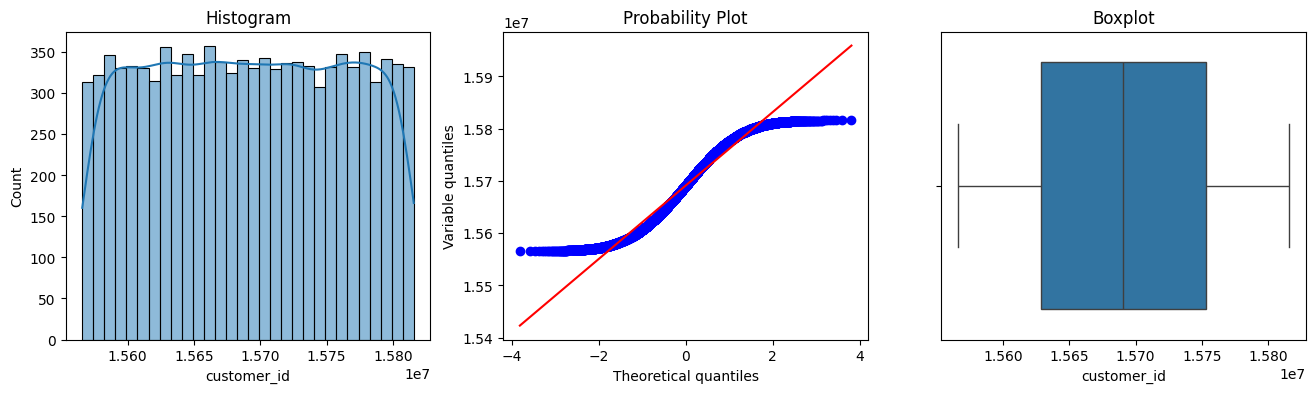

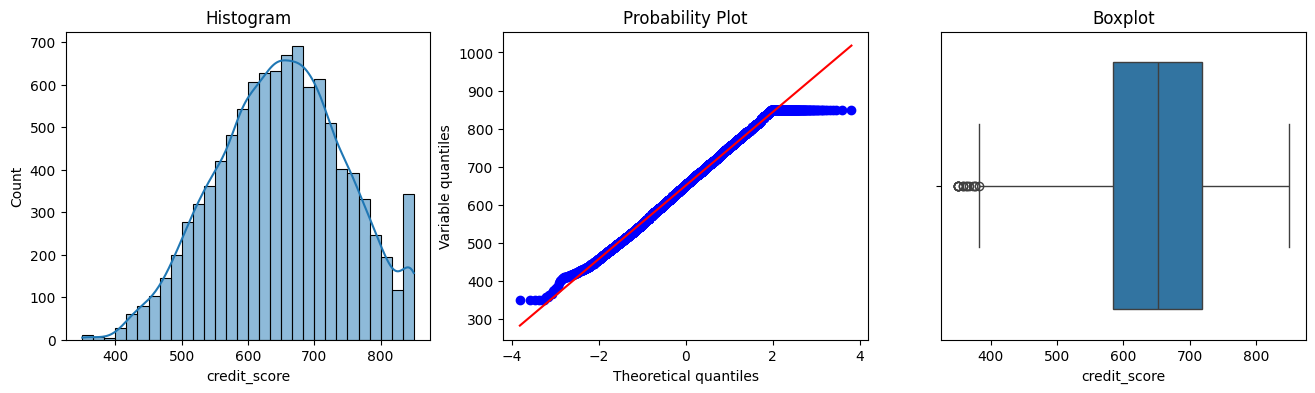

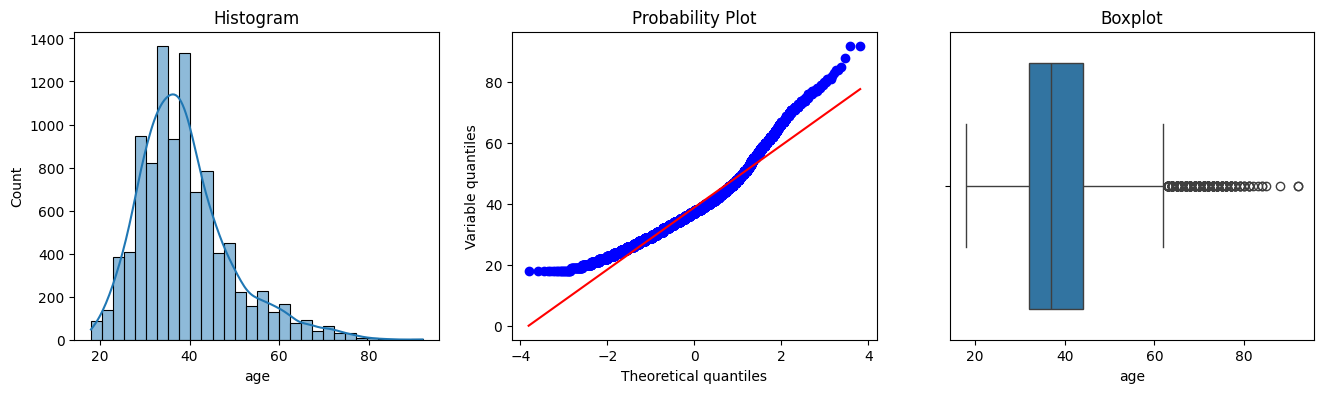

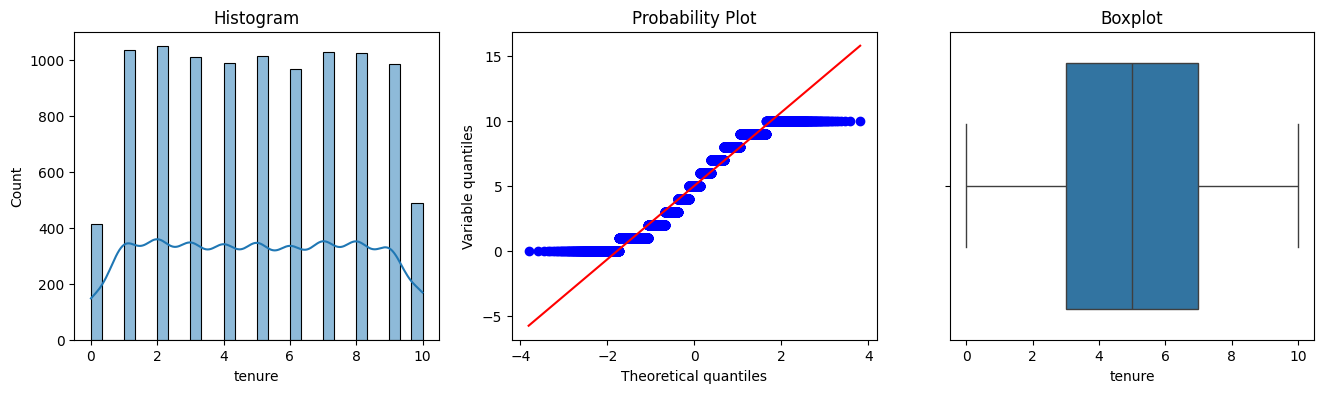

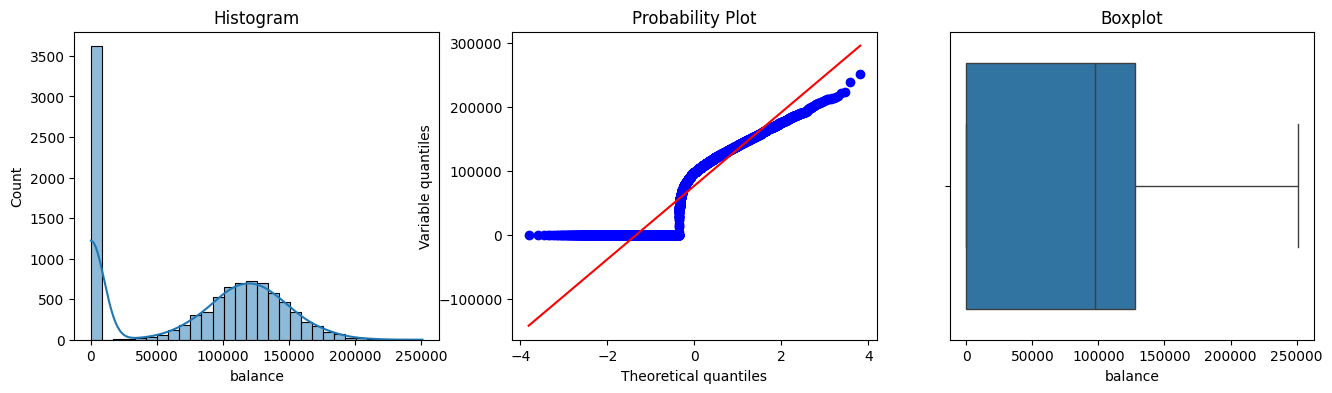

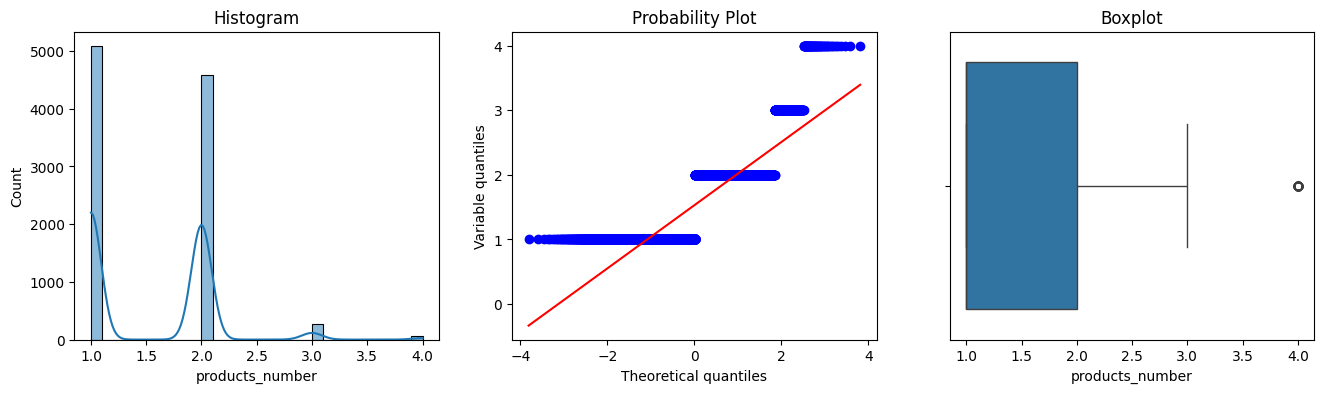

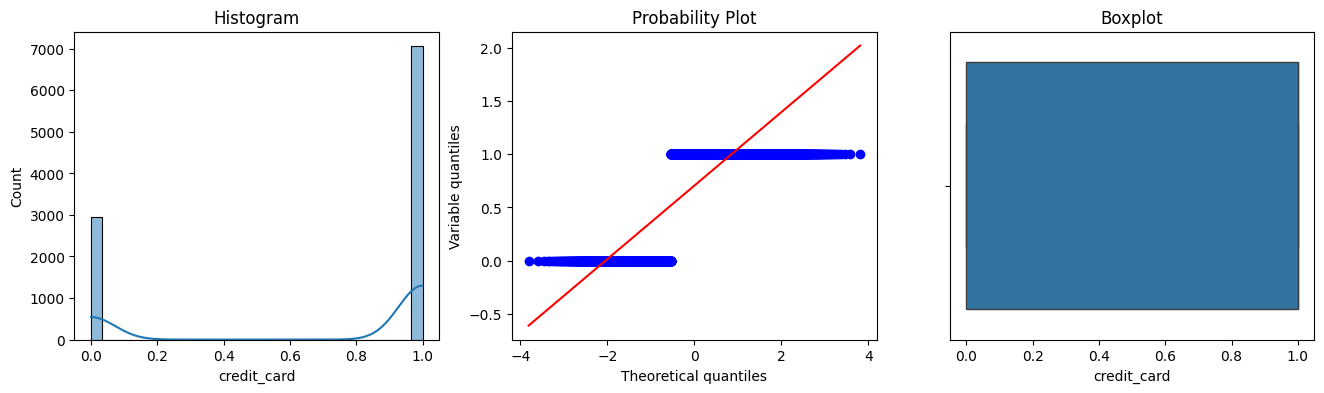

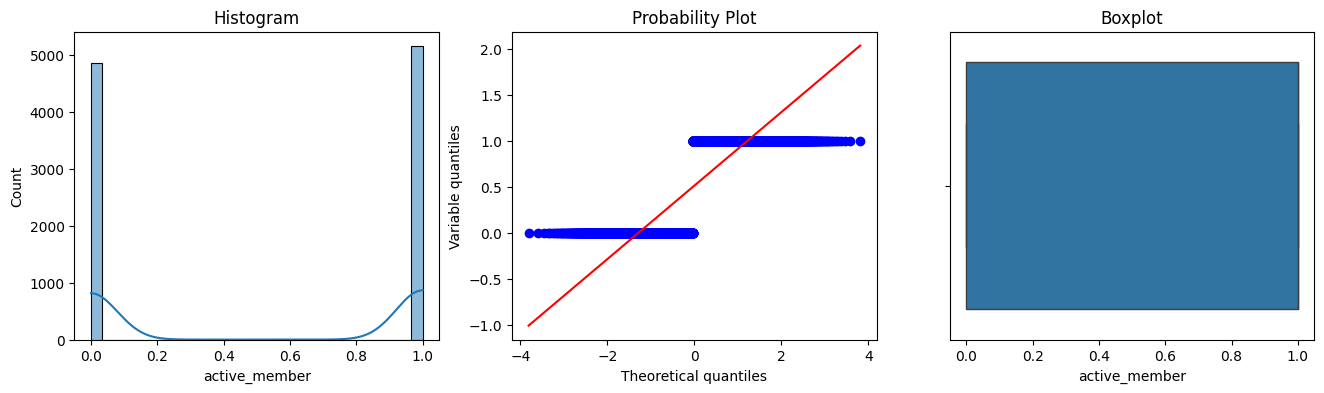

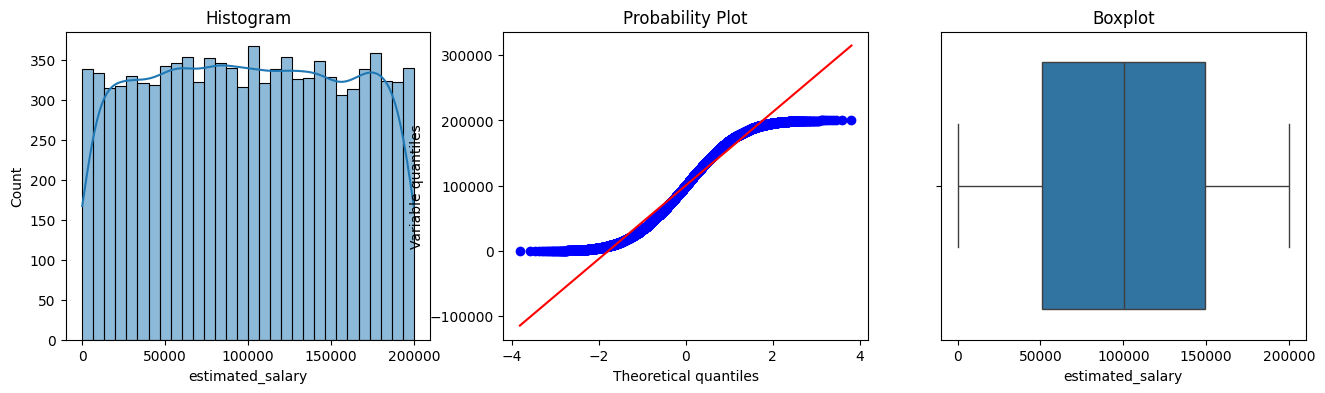

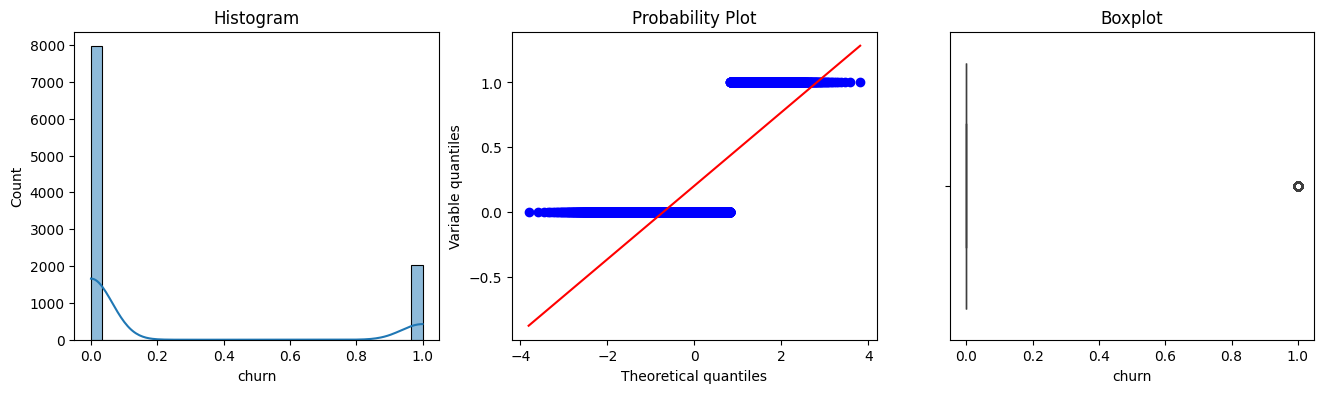

In [11]:
distribution_data_numerik = df.select_dtypes(include=['number']).columns
for col in distribution_data_numerik:
    check_plot(df, col)

ada beberapa outliers, akan menggunakan scaling ***RobustScaler***

## Exploratory Data Analysis
- Lakukan analisa pada EDA menggunakan visualisasi di tiap variabel :
1. Kategorikal vs Churn Label
2. Numerik vs Churn Label
3. Anda wajib menuliskan insight, sebagai langkah untuk pencegahan churn dalam strategi marketing

In [12]:
for col in df.select_dtypes(include='object').columns:
  print()
  print(f'===={col}====')
  print(df[col].value_counts())


====country====
country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

====gender====
gender
Male      5457
Female    4543
Name: count, dtype: int64


In [13]:
df.select_dtypes(include='number').columns


Index(['customer_id', 'credit_score', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

In [14]:
df_value = (['credit_score', 'country', 'gender', 'age', 'tenure',
             'products_number', 'credit_card', 'active_member', 'churn'])

for col in df_value:
  print()
  print(f'===={col}====')
  print(df[col].value_counts())


====credit_score====
credit_score
850    233
678     63
655     54
705     53
667     53
684     52
651     50
670     50
683     48
652     48
660     48
648     48
640     47
682     47
663     47
637     46
710     45
686     45
714     45
645     45
687     45
679     45
633     45
706     44
627     44
646     44
619     44
625     43
628     43
608     43
584     43
632     42
635     42
613     42
712     41
698     41
554     41
701     41
680     40
634     40
699     40
597     40
606     40
601     40
644     39
711     39
656     39
681     39
696     38
611     38
641     38
666     38
718     38
581     38
630     38
593     38
659     38
592     38
653     37
624     37
639     37
724     37
642     37
629     37
614     37
695     37
662     37
675     37
579     37
650     37
605     37
616     37
697     36
636     36
669     36
622     36
709     36
590     36
607     36
649     36
727     36
676     36
707     36
615     35
668     35
677     35
685     35
661     

In [15]:
target_column = 'churn'

category_columns = [
  'country',
  'gender'
]


numeric_columns = [
  'credit_score',
  'age',
  'tenure',
  'balance',
  'products_number',
  'credit_card',
  'active_member',
  'estimated_salary'
]

kolom customer_id tidak dipakai di numeric_columns karena tidak memiliki nilai prediktif dalam konteks churn, hanya sebagai identifikasi unik dari nasabah saja.

### Target

In [16]:
df.groupby(target_column).size()

,0
churn,
0,7963
1,2037


In [17]:
df.groupby(target_column).size() / df.shape[0] * 100

,0
churn,
0,79.63
1,20.37


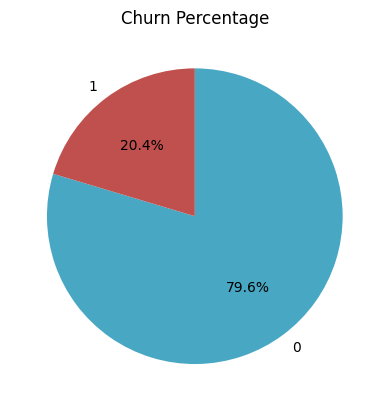

In [18]:
target_column = 'churn'

plt.pie(
    df.groupby(target_column).size(),
    labels=df.groupby(target_column).size().index,
    autopct='%1.1f%%',
    colors=[HEX_BLUE, HEX_RED],
    startangle=90,
    counterclock=False
)
plt.title('Churn Percentage')
plt.show()


***sebanyak 20.4% nasabah berhenti menjadi nasabah/churn***

### Category

In [19]:
df_dist_cat = pd.DataFrame()
for column in category_columns:
  df_temp = df.pivot_table(
    index = column,
    columns = 'churn',
    values = 'customer_id',
    aggfunc = 'nunique',
  )

  res = chi2_contingency(df_temp)
  coef = round(association(df_temp, method='cramer'), 2) # cramer's V

  index_tuples = [(column, x) for x in df_temp.index]
  df_temp.index = pd.MultiIndex.from_tuples(
    index_tuples,
    names=['column', 'value'],
  )

  df_temp['churn_proba'] = df_temp[1] / (df_temp[0] + df_temp[1])
  df_temp['pvalue'] = ('' if res.pvalue > 0.05 else '< 0.05')
  df_temp['coef'] = coef

  df_dist_cat = pd.concat([df_dist_cat, df_temp])

df_dist_cat

churn               0     1  churn_proba  pvalue  coef
column  value                                         
country France   4204   810     0.161548  < 0.05  0.17
        Germany  1695   814     0.324432  < 0.05  0.17
        Spain    2064   413     0.166734  < 0.05  0.17
gender  Female   3404  1139     0.250715  < 0.05  0.11
        Male     4559   898     0.164559  < 0.05  0.11

insight:

pada kolom country
- coef menunjukan kekuatan hubungan ***column*** dengan ***churn*** 0.17 (hubungan lemah ke sedang dengan churn)
- pvalue < 0.05 menunjukan adanya hubungan signifikan secara statistik
- churn_proba = Germany adalah negara yang paling tinggi churn 32%

***kesimpulan : Negara asal punya pengaruh terhadap churn. Pelanggan Jerman paling banyak keluar***

pada kolom gender
- coef menunjukan kekuatan hubungan dengan churn 0.11 (kekuatan hubungan lemah)
- pvalue < 0.05 menunjukan adanya hubungan signifikan secara statistik
- churn_proba = female 25% lebih banyak yang churn dibanding male

***kesimpulan : female cenderung lebih banyak yang churn namun efek atau dampaknya terhadap churn tidak terlalu kuat secara coef***



### Numeric

In [20]:
def show_distribution_numeric(column):
  res = ttest_ind(
    df[df['churn'] == 0][column],
    df[df['churn'] == 1][column],
    equal_var = False,
    alternative = 'two-sided',
  )
  print('p-value: {0:.2f}'.format(res.pvalue))

  sns.violinplot(
    data = df,
    x = column,
    hue = 'churn',
    split = True,
    inner = 'quart',
    gap = 0.1,
    palette = {1: HEX_RED, 0: HEX_BLUE},
  )

In [21]:
df.select_dtypes(include='number').columns

Index(['customer_id', 'credit_score', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

p-value: 0.01


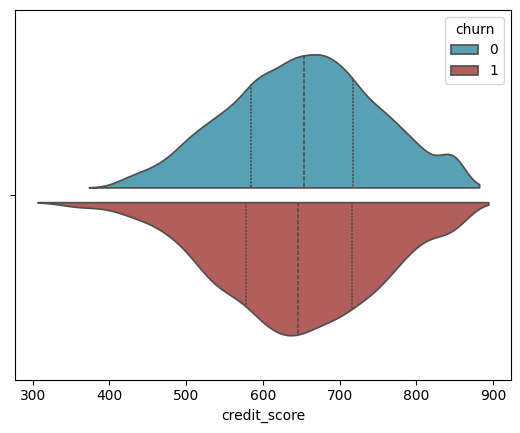

In [22]:
show_distribution_numeric('credit_score')

- p-value < 0.05 ***ada hubungan signifikan*** dengan churn secara statistik
- nilai median antara churn 0 & 1: churn 1 sedikit lebih condong ke arah kiri menunjukan bahwa nasabah dengan credit_score rendah cenderung lebih sering churn.

p-value: 0.00


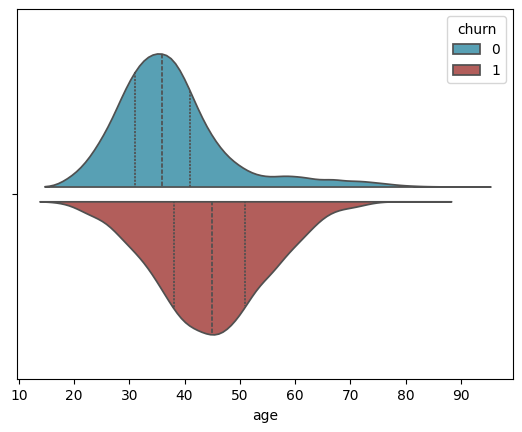

In [23]:
show_distribution_numeric('age')

- p-value < 0.05 ***ada hubungan signifikan*** dengan churn secara statistik
- nilai median antara churn 0 & 1: menunjukan usia nasabah di rentang 40 - 45 cenderung banyak yang churn


p-value: 0.17


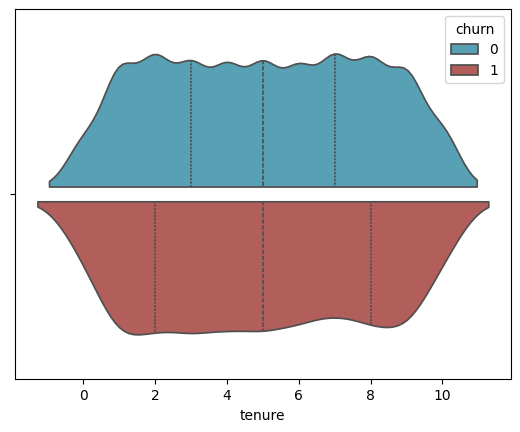

In [24]:
show_distribution_numeric('tenure')

- p-value > 0.05 ***tidak ada hubungan signifikan dengan churn*** secara statistik
- nilai median antara churn 0 & 1: menunjukan nilai yang sebanding artinya tidak ada kecenderungan tenure lebih tinggi atau rendah mempengaruhi perilaku churn pada nasabah

p-value: 0.00


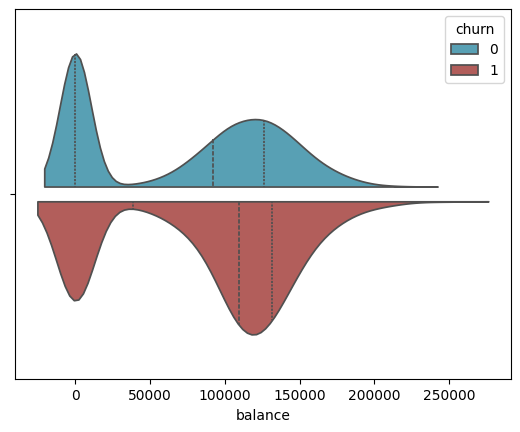

In [25]:
show_distribution_numeric('balance')

- p-value < 0.05 ***ada hubungan signifikan dengan churn*** secara statistik
- nilai median antara churn 0 & 1: balance pada nasabah direntang 100.000 hingga 150.000 banyak yang churn. nilai median churn condong ke kanan artinya nasabah dengan nilai balance yang lebih besar cenderung meninggalkan bank atau churn

p-value: 0.00


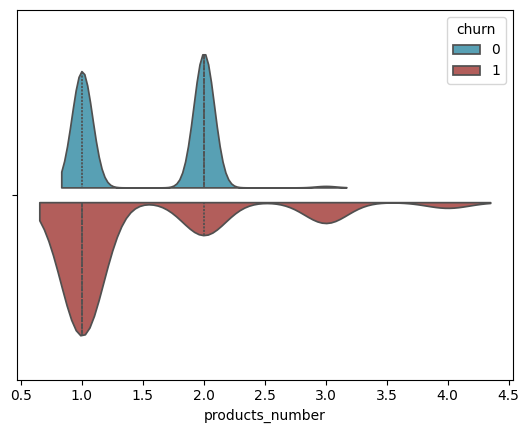

In [26]:
show_distribution_numeric('products_number')

- p-value < 0.05 ***ada hubungan signifikan dengan churn*** secara statistik
- nilai median antara churn 0 & 1: hampir serupa
- distribusi : untuk ***yang churn*** Products_number nya lebih beragam dari yang hanya 1 product hingga 4, sedangakan ***yang tidak churn*** itu lebih sedikit hanya sampai 3 product, dan mayoritas di 1 dan 2 product.

***artinya jumlah product mempengaruhi perilaku churn apalagi yang hanya 1 product saja***

p-value: 0.48


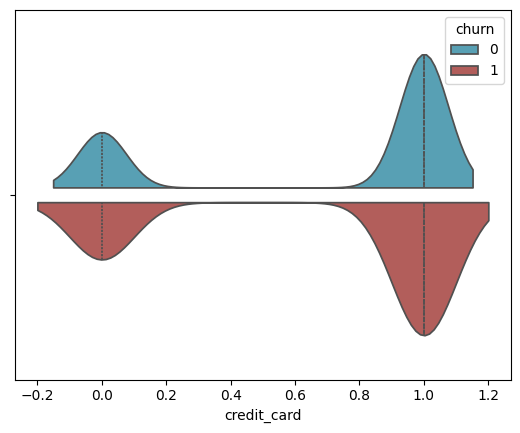

In [27]:
show_distribution_numeric('credit_card')

- p-value > 0.05 ***Tidak ada hubungan signifikan dengan churn*** secara statistik
- nilai median antara churn 0 & 1: hampir serupa
- distribusi : hampir serupa, ***credit_card tidak mempengaruhi perilaku churn***

p-value: 0.00


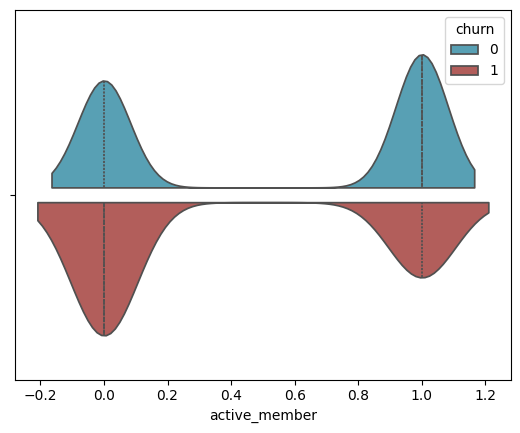

In [28]:
show_distribution_numeric('active_member')

- p-value < 0.05 ***ada hubungan signifikan dengan churn*** secara statistik
- nilai median antara churn 0 & 1: hampir serupa
- distribusi : jumlah yang active namun ternyata churn itu hampir setengahnya dari yang active namun tidak churn. kemudian yang tidak active (tidak churn) juga melebihi setengahnya dari yang tidak active (churn).

***active_member mempengaruhi perilaku churn***

p-value: 0.23


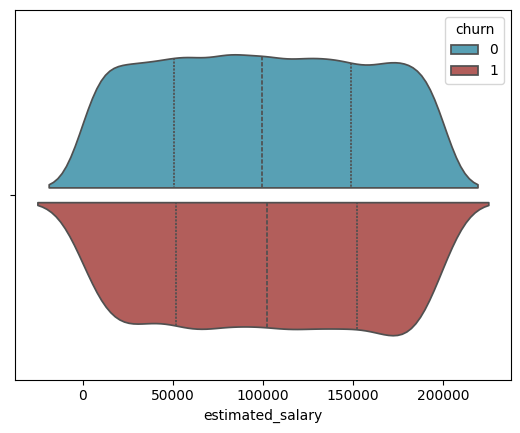

In [29]:
show_distribution_numeric('estimated_salary')

- p-value > 0.05 ***Tidak ada hubungan signifikan dengan churn*** secara statistik
- nilai median antara churn 0 & 1: yang tidak churn(0) sedikit condong ke kiri, artinya salary yang sedikit lebih kecil tidak churn namun ini hubungannya tidak signifikan secara statistik p-value > 0.05
- distribusi : hampir serupa, ***estimated_salary tidak mempengaruhi perilaku churn***

In [30]:
signifikan_variabel = ['credit_score','age','balance','products_number','active_member']
not_signifikan_variabel = ['tenure','credit_card','estimated_salary']

## Bivariate Correlation

### category & category

In [31]:
def show_relationship_category_category(column1, column2):
  df_temp = df.pivot_table(
    index = column1,
    columns = column2,
    values = 'customer_id',
    aggfunc = 'nunique',
  )
  df_temp = df_temp.fillna(0)
  df_temp = df_temp.astype(int)

  res = chi2_contingency(df_temp)
  coef = round(association(df_temp, method='cramer'), 2)

  return df_temp, ('' if res.pvalue > 0.05 else '< 0.05'), coef

In [32]:
category_columns

['country', 'gender']

In [33]:
df_corr_cat_cat = pd.DataFrame()

for i in range(len(category_columns)):
  column1 = category_columns[i]
  for j in range(i+1, len(category_columns)):
    column2 = category_columns[j]
    _, pvalue, coef = show_relationship_category_category(column1, column2)

    df_temp = pd.DataFrame({
      'column1': [column1],
      'column2': [column2],
      'pvalue': [pvalue],
      'coef': [coef],
    })
    df_corr_cat_cat = pd.concat([df_corr_cat_cat, df_temp])

df_corr_cat_cat

,column1,column2,pvalue,coef
0,country,gender,< 0.05,0.03


p-value: < 0.05
Cramer's V: 0.03


<Axes: xlabel='gender', ylabel='country'>

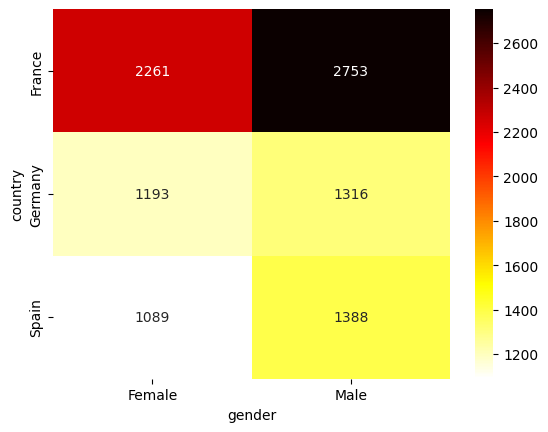

In [34]:
df_temp, pvalue, coef = show_relationship_category_category(
  'country',
  'gender',
)
print('p-value:', pvalue)
print('Cramer\'s V:', coef)
sns.heatmap(df_temp, cmap='hot_r', annot=True, fmt='.0f')

- pvalue < 0.05 secara statistik ada perbedaan distribusi gender dari berbagai country
- coef menunjukan nilai hampir mendekati 0 yaitu 0.03 (kekuatan hubungan sangat lemah)

***kesimpulannya ada perbedaan proporsi gender antar negara, tapi hubungan antara country dan gender sangat lemah dan secara bisnis tidak cukup kuat untuk dijadikan insight yang berguna***

<Axes: xlabel='column2', ylabel='column1'>

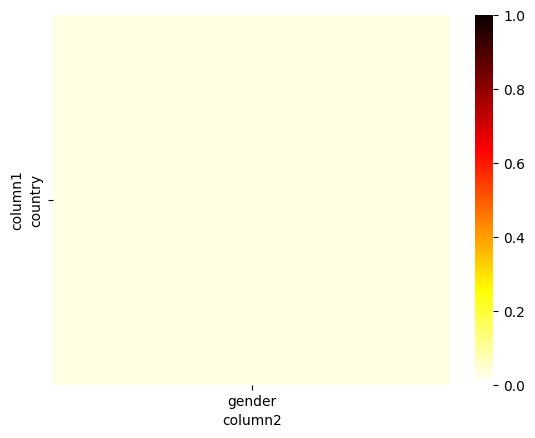

In [35]:
df_temp = df_corr_cat_cat.pivot_table(
  index='column1',
  columns='column2',
  values='coef',
)

for column1 in df_corr_cat_cat['column1']:
  for column2 in df_corr_cat_cat['column2']:
    if np.isnan(df_temp.loc[column1, column2]) and column1 < column2:
      df_temp.loc[column1, column2] = df_temp.loc[column2, column1]
      df_temp.loc[column2, column1] = None

sns.heatmap(
  df_temp,
  vmin = 0,
  vmax = 1,
  cmap = 'hot_r',
)

***hasil heatmap menunjukan bahwa tidak ada hubungan kuat antara variabel kategorik tersebut. ini sesuai dengan hasil nilai coef yang hanya 0.03 (mendekati 0)***

### numeric & numeric

In [36]:
numeric_columns

['credit_score',
 'age',
 'tenure',
 'balance',
 'products_number',
 'credit_card',
 'active_member',
 'estimated_salary']

In [37]:
df[numeric_columns].corr()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
credit_score,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384
age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201
tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784
balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797
products_number,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204
credit_card,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933
active_member,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421
estimated_salary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000


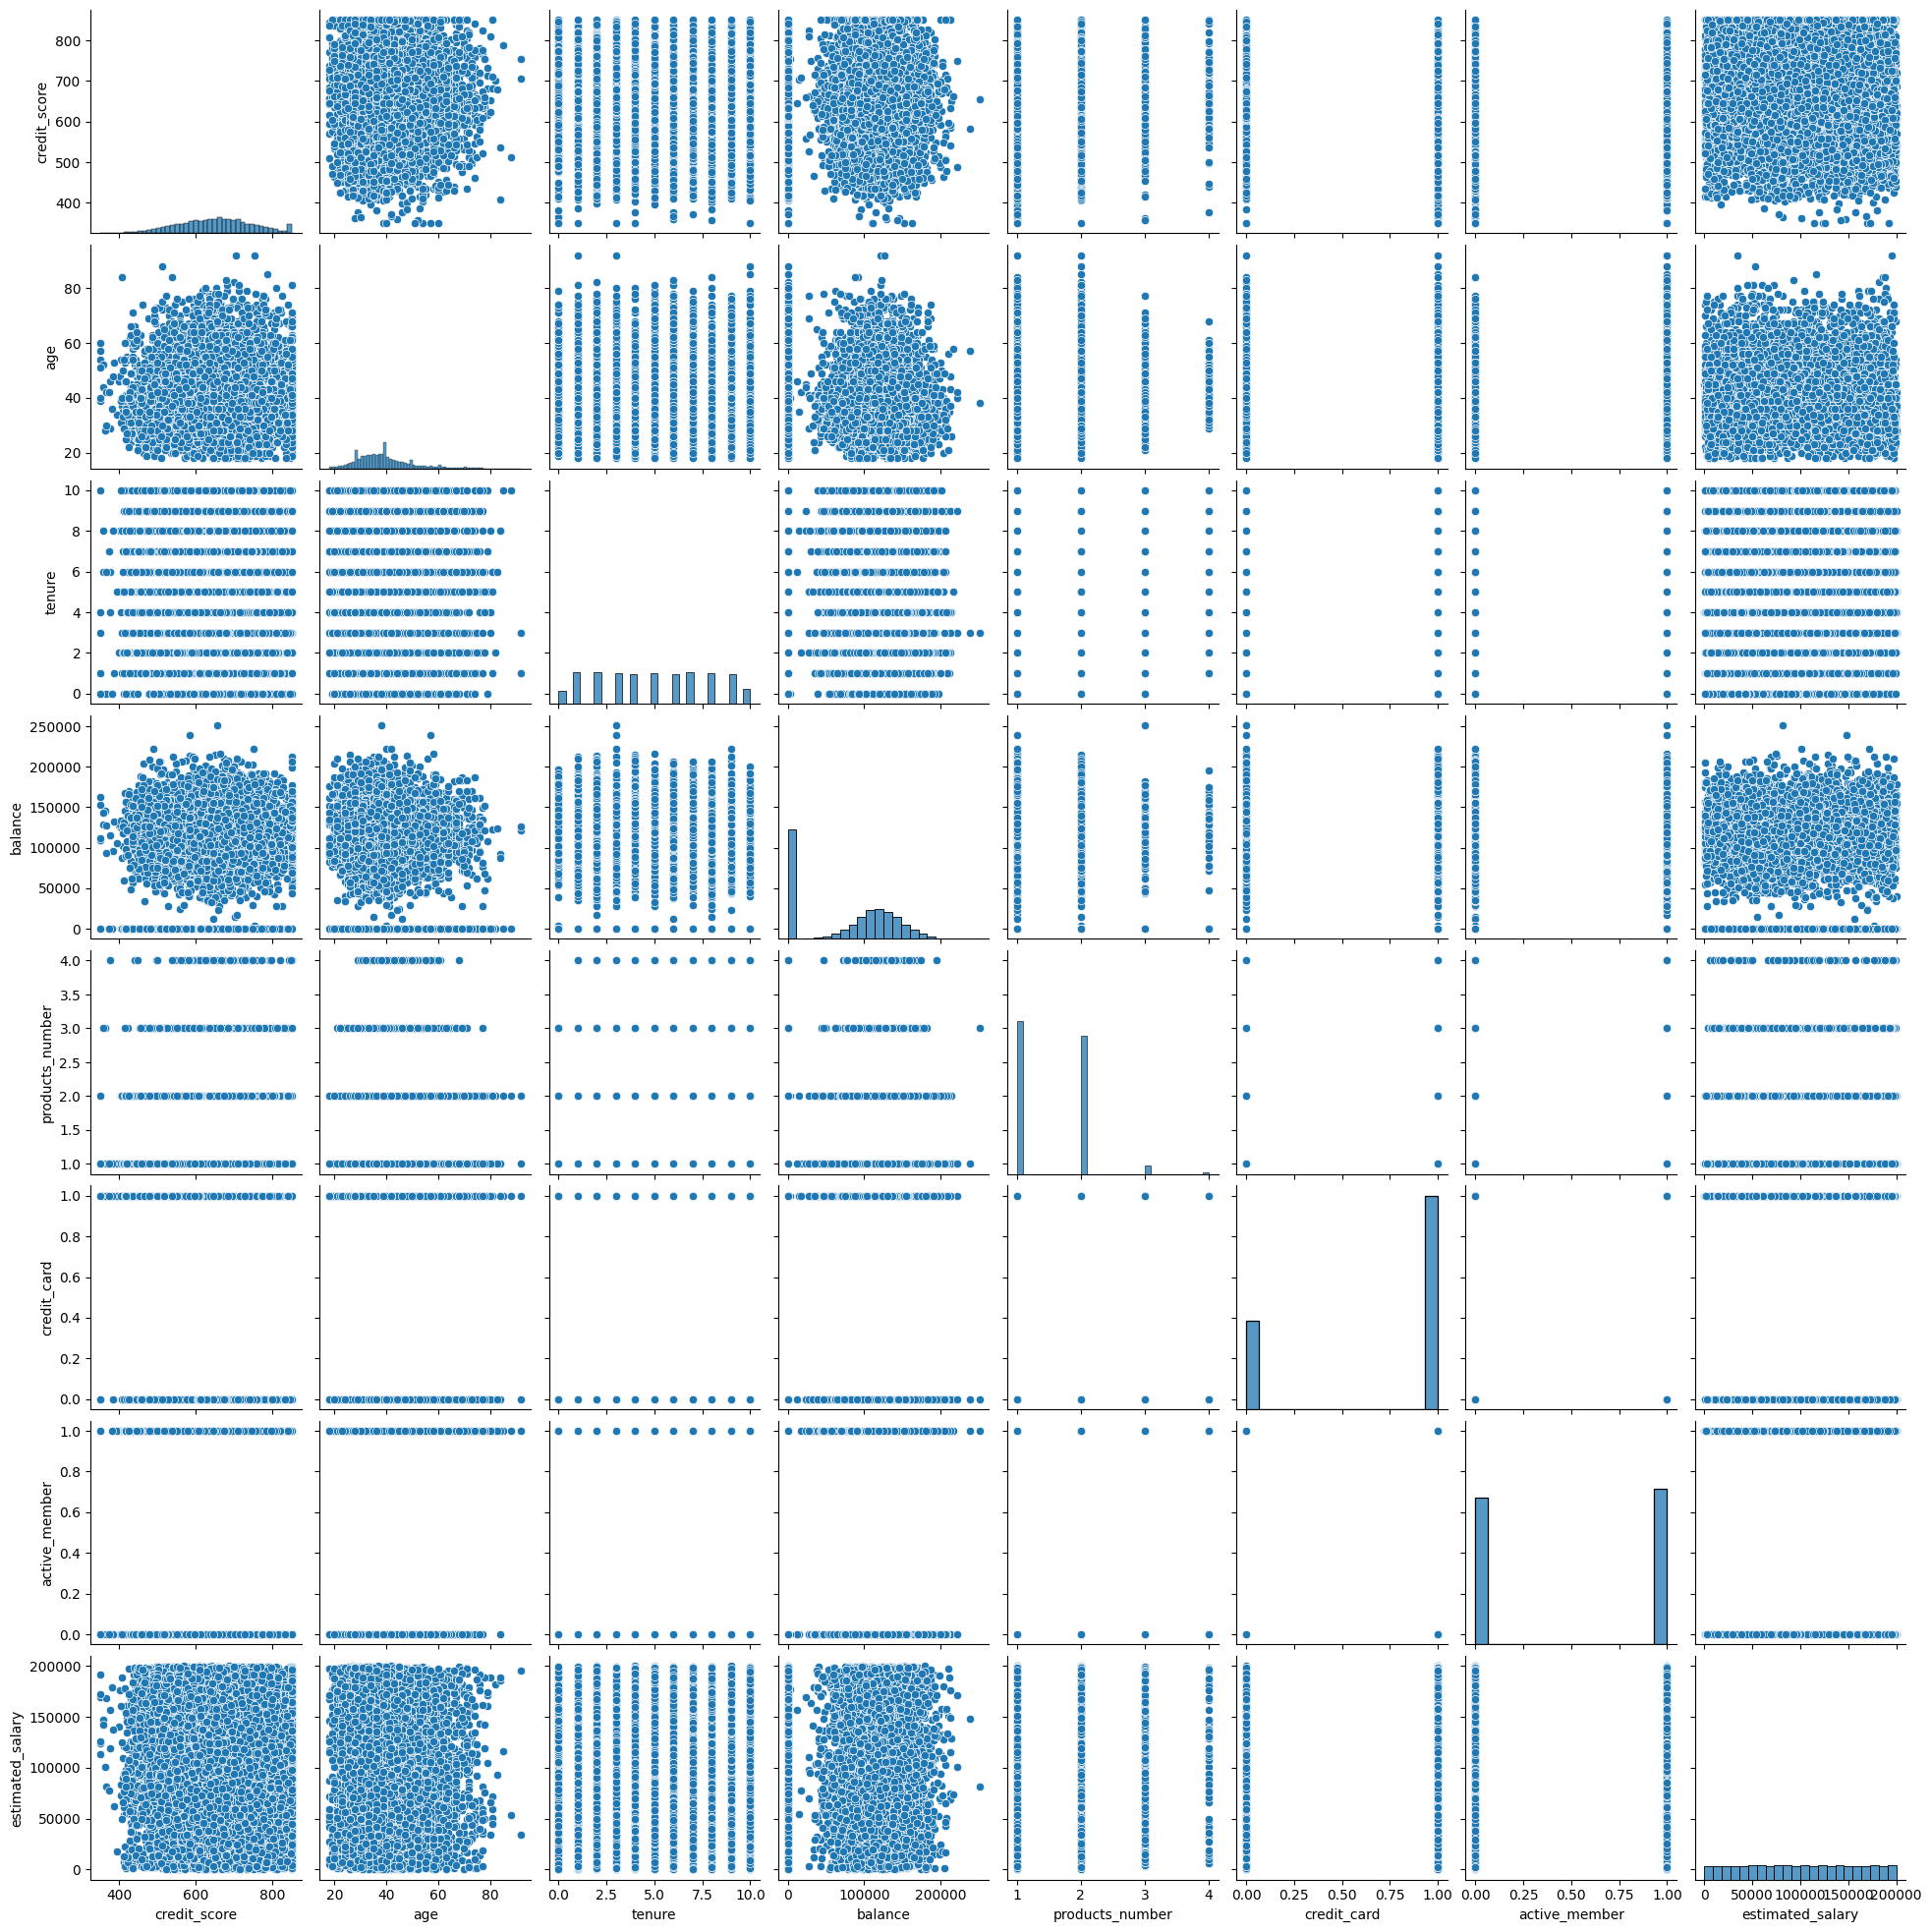

In [38]:
sns.pairplot(df[numeric_columns])

Insight:

- active_member vs credit_score = 0.025 (hubungan positif sangat lemah)
- age vs active_member = 0.085 (hubunagn positif = nasabah lebih tua sedikit lebih aktif)
- balance vs products_number = -0.304 (hubungan negatif = semakin banyak product semakin kecil balance)


sisa nya mendekati 0 hampir tidak ada hubungan linear antar variabelnya

### category & numeric

In [39]:
# contoh dari materi Hands on

# def show_relationship_category_numeric(cat, num):
#   df_temp = df[[cat, num, 'customer_id']].copy()
#   df_temp[num] = pd.qcut(
#     df_temp[num],
#     4,
#     labels=['low','midlow','midhigh','high'],
#   )

#   df_temp = df_temp.pivot_table(
#     index = cat,
#     columns = num,
#     values = 'customer_id',
#     aggfunc = 'nunique',
#     observed=False,
#   )
#   df_temp = df_temp.fillna(0)
#   df_temp = df_temp.astype(int)

#   res = chi2_contingency(df_temp)
#   coef = round(association(df_temp, method='cramer'), 2)

#   return df_temp, ('' if res.pvalue > 0.05 else '< 0.05'), coef

In [40]:
def show_relationship_category_numeric(cat, num):
  df_temp = df[[cat, num, 'customer_id']].copy()

  try:
    # bagi menjadi 4 kuartil
    df_temp[num] = pd.qcut(
      df_temp[num],
      4,
      labels=['low', 'midlow', 'midhigh', 'high'],
      duplicates='drop'  # cegah error jika batas bin tidak unik
    )
  except ValueError:
    # Jika gagal, jadikan 2 kategori saja: low & high berdasarkan median
    median_val = df_temp[num].median()
    df_temp[num] = np.where(df_temp[num] <= median_val, 'low', 'high')

  # Buat pivot table untuk uji chi-square
  df_temp = df_temp.pivot_table(
    index=cat,
    columns=num,
    values='customer_id',
    aggfunc='nunique',
    observed=False,
  ).fillna(0).astype(int)

  # Uji hubungan kategori-numerik (pakai chi-square)
  res = chi2_contingency(df_temp)
  coef = round(association(df_temp, method='cramer'), 2)

  return df_temp, ('' if res.pvalue > 0.05 else '< 0.05'), coef


In [41]:
df_corr_cat_num = pd.DataFrame()

for i in range(len(category_columns)):
  column1 = category_columns[i]
  for j in range(len(numeric_columns)):
    column2 = numeric_columns[j]
    _, pvalue, coef = show_relationship_category_numeric(column1, column2)

    df_temp = pd.DataFrame({
      'column1': [column1],
      'column2': [column2],
      'pvalue': [pvalue],
      'coef': [coef],
    })
    df_corr_cat_num = pd.concat([df_corr_cat_num, df_temp])

df_corr_cat_num

/usr/local/lib/python3.12/dist-packages/scipy/stats/contingency.py:512: RuntimeWarning: invalid value encountered in scalar divide
  value = phi2 / min(n_cols - 1, n_rows - 1)
/usr/local/lib/python3.12/dist-packages/scipy/stats/contingency.py:512: RuntimeWarning: invalid value encountered in scalar divide
  value = phi2 / min(n_cols - 1, n_rows - 1)
/usr/local/lib/python3.12/dist-packages/scipy/stats/contingency.py:512: RuntimeWarning: invalid value encountered in scalar divide
  value = phi2 / min(n_cols - 1, n_rows - 1)
/usr/local/lib/python3.12/dist-packages/scipy/stats/contingency.py:512: RuntimeWarning: invalid value encountered in scalar divide
  value = phi2 / min(n_cols - 1, n_rows - 1)


,column1,column2,pvalue,coef
0,country,credit_score,< 0.05,0.03
0,country,age,< 0.05,0.04
0,country,tenure,< 0.05,0.03
0,country,balance,< 0.05,0.36
0,country,products_number,< 0.05,0.03
0,country,credit_card,,NaN
0,country,active_member,,NaN
0,country,estimated_salary,,0.01
0,gender,credit_score,,0.01
0,gender,age,< 0.05,0.05


- country vs balance menunjukan signifikansi secara statistik p-value < 0.05 dengan kekuatan hubungan coef 0.36
- nilai yang lain memiliki kekuatan hubungan yang lemah di bawah 0.04 saja


***kesimpulannya negara asal nasabah berpengaruh terhadap nilai saldo / balance mereka, strategi retensi mungkin bisa dibedakan per negara***

<Axes: xlabel='balance', ylabel='country'>

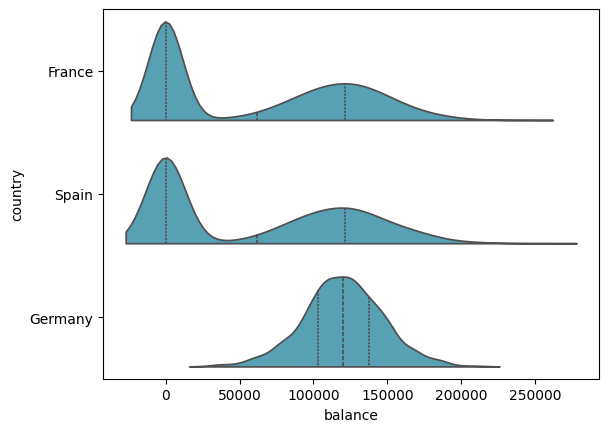

In [42]:
sns.violinplot(
  df,
  x='balance',
  y='country',
  split = True,
  inner = 'quart',
  color = HEX_BLUE,
)

In [43]:
df_dist_cat = pd.DataFrame()
for column in category_columns:
  df_temp = df.pivot_table(
    index = column,
    columns = 'churn',
    values = 'customer_id',
    aggfunc = 'nunique',
  )

  res = chi2_contingency(df_temp)
  coef = round(association(df_temp, method='cramer'), 2) # cramer's V

  index_tuples = [(column, x) for x in df_temp.index]
  df_temp.index = pd.MultiIndex.from_tuples(
    index_tuples,
    names=['column', 'value'],
  )

  df_temp['churn_proba'] = df_temp[1] / (df_temp[0] + df_temp[1])
  df_temp['pvalue'] = ('' if res.pvalue > 0.05 else '< 0.05')
  df_temp['coef'] = coef

  df_dist_cat = pd.concat([df_dist_cat, df_temp])

df_dist_cat

churn               0     1  churn_proba  pvalue  coef
column  value                                         
country France   4204   810     0.161548  < 0.05  0.17
        Germany  1695   814     0.324432  < 0.05  0.17
        Spain    2064   413     0.166734  < 0.05  0.17
gender  Female   3404  1139     0.250715  < 0.05  0.11
        Male     4559   898     0.164559  < 0.05  0.11

- France & Spain memiliki sebagian besar nasabah dengan saldo 0 dan 100.000+
- Germany sangat sedikit yang memiliki saldo 0, dan mayoritas aktif secara finansial dan memiliki saldo tinggi seragam di 100.000 - 150.000 (namun churn_proba germany 32% tinggi dibanding negara lain pada uji statistik kategorik vs kategorik)


kesimpulan :

Nasabah dengan saldo tinggi tidak selalu loyal. Meskipun mereka memiliki dana besar, mungkin mereka merasa kurang puas dengan layanan, atau lebih sensitif terhadap faktor non-keuangan (misalnya biaya, pengalaman digital, atau tawaran bank pesaing).

sedangkan, nasabah France dan Spain banyak yang memiliki saldo nol mungkin nasabah pasif atau tidak menggunakan produk utama bank namun churn_proba mereka justru lebih rendah. France 16% dan Spain 17%.


## Assignment Feature Engineering
1. Perhatikan splitting
2. Serta beri alasan anda dalam melakukan proses feature engineering di setiap prosesnya

### Split data

In [44]:
target_column

'churn'

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
  df.drop(columns=target_column),
  df[target_column],
  test_size = 0.2,
  random_state = 11,
  stratify = df[target_column],
)

In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

check proportion target (y)

In [47]:
# proportion of churn on train test
y_train.value_counts() / y_train.shape[0] * 100

,count
churn,
0,79.625
1,20.375


In [48]:
y_test.value_counts() / y_test.shape[0] * 100

,count
churn,
0,79.65
1,20.35


### Data Transformation

In [49]:
df.head(1)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [50]:
dropped_columns = ['customer_id']

In [51]:
X_train = X_train.drop(columns=dropped_columns)
X_train.shape

(8000, 10)

In [52]:
X_test = X_test.drop(columns=dropped_columns)
X_test.shape

(2000, 10)

### Encode Variable

#### Binary Value (Label Encoding)

In [53]:
X_train.shape, X_test.shape

((8000, 10), (2000, 10))

In [54]:
X_train.head(1)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
6614,689,France,Male,34,1,165312.27,1,1,0,155495.63


In [55]:
X_test.head(1)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
156,758,France,Female,33,7,0.0,2,0,0,82996.47


In [56]:
# comtoh di hands on
# encoder = LabelEncoder()
# label_encode = encoder.fit_transform(label_encode)
# ['{0}: {1}'.format(i, v) for i, v in enumerate(encoder.classes_)]

In [57]:
# Fit encoder di data train
encoder = LabelEncoder()
X_train['gender_encoded'] = encoder.fit_transform(X_train['gender'])

# Transform data test dengan encoder yang sama
X_test['gender_encoded'] = encoder.transform(X_test['gender'])

# Opsional: hapus kolom asli
X_train = X_train.drop(columns=['gender'])
X_test = X_test.drop(columns=['gender'])

# Cek mapping-nya
dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))


{'Female': np.int64(0), 'Male': np.int64(1)}

In [58]:
X_train.shape, X_test.shape

((8000, 10), (2000, 10))

In [59]:
X_train.head(1)

,credit_score,country,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,gender_encoded
6614,689,France,34,1,165312.27,1,1,0,155495.63,1


In [60]:
X_test.head(1)

,credit_score,country,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,gender_encoded
156,758,France,33,7,0.0,2,0,0,82996.47,0


#### Nominal (OHE / One Hot Encoding)

In [61]:
X_train.head(1)

,credit_score,country,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,gender_encoded
6614,689,France,34,1,165312.27,1,1,0,155495.63,1


In [62]:
X_test.head(1)

,credit_score,country,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,gender_encoded
156,758,France,33,7,0.0,2,0,0,82996.47,0


In [63]:
X_train.shape, X_test.shape

((8000, 10), (2000, 10))

In [64]:
# One-hot encode train
dummies_train = pd.get_dummies(X_train['country'], prefix='country', dtype=int)

# One-hot encode test
dummies_test = pd.get_dummies(X_test['country'], prefix='country', dtype=int)

# Samakan kolom test agar sama dengan train
dummies_test = dummies_test.reindex(columns=dummies_train.columns, fill_value=0)

# Gabungkan kembali ke dataframe
X_train = pd.concat([X_train, dummies_train], axis=1)
X_test = pd.concat([X_test, dummies_test], axis=1)

# Hapus kolom asli
X_train = X_train.drop(columns=['country'])
X_test = X_test.drop(columns=['country'])

In [65]:
X_train.shape, X_test.shape

((8000, 12), (2000, 12))

In [66]:
X_train.head(1)

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,gender_encoded,country_France,country_Germany,country_Spain
6614,689,34,1,165312.27,1,1,0,155495.63,1,1,0,0


In [67]:
X_test.head(1)

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,gender_encoded,country_France,country_Germany,country_Spain
156,758,33,7,0.0,2,0,0,82996.47,0,1,0,0


In [68]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 6614 to 7317
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      8000 non-null   int64  
 1   age               8000 non-null   int64  
 2   tenure            8000 non-null   int64  
 3   balance           8000 non-null   float64
 4   products_number   8000 non-null   int64  
 5   credit_card       8000 non-null   int64  
 6   active_member     8000 non-null   int64  
 7   estimated_salary  8000 non-null   float64
 8   gender_encoded    8000 non-null   int64  
 9   country_France    8000 non-null   int64  
 10  country_Germany   8000 non-null   int64  
 11  country_Spain     8000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 812.5 KB


In [69]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 156 to 1675
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      2000 non-null   int64  
 1   age               2000 non-null   int64  
 2   tenure            2000 non-null   int64  
 3   balance           2000 non-null   float64
 4   products_number   2000 non-null   int64  
 5   credit_card       2000 non-null   int64  
 6   active_member     2000 non-null   int64  
 7   estimated_salary  2000 non-null   float64
 8   gender_encoded    2000 non-null   int64  
 9   country_France    2000 non-null   int64  
 10  country_Germany   2000 non-null   int64  
 11  country_Spain     2000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 203.1 KB


### Scaling

Before Scaling

In [70]:
X_train.head(3)

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,gender_encoded,country_France,country_Germany,country_Spain
6614,689,34,1,165312.27,1,1,0,155495.63,1,1,0,0
2694,628,29,3,113146.98,2,0,1,124749.08,1,0,1,0
7439,432,27,6,62339.81,2,0,0,53874.67,0,1,0,0


In [71]:
scale_cols = ['credit_score', 'age', 'tenure','products_number', 'balance', 'estimated_salary']

In [72]:
from sklearn import preprocessing

scaler = preprocessing.RobustScaler()
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

After Scaling

In [73]:
X_train.head(1)

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,gender_encoded,country_France,country_Germany,country_Spain
6614,0.278195,-0.25,-0.8,0.532706,0.0,1,0,0.577199,1,1,0,0


In [74]:
X_test.head(1)

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,gender_encoded,country_France,country_Germany,country_Spain
156,0.796992,-0.333333,0.4,-0.762638,1.0,0,0,-0.163141,0,1,0,0


### Assignment Modelling
1. Gunakan Machine Learning Model dibawah ini :
- Logistic Regression
- KNN
- Decision tree
- SVM RBF
- Dengan ratio : class_weight = balanced #class_weight = pembobotan, (kecuali pada KNN)
2. Lakukan fitting dan Model evaluasi di tiap model, keluarkan nilai pada confusion matrix (akurasi, recall, presisi, f1-score). Fokuslah pada nilai recall untuk menentukan model terbaik (melihat pada selisih nilai evaluasi di train dengan test). Pilihlah metrics (akurasi / recall / dsb) yg tepat serta berikan alasannya.

#### Logistic Regression

In [75]:
model = LogisticRegression(
  penalty = 'l2',
  C = 1.0,
  class_weight = 'balanced',
  random_state = 11,
  solver = 'lbfgs',
)

model.fit(X_train, y_train)

scores = cross_val_score(
  model,
  X_train,
  y_train,
  cv = 5,
  scoring = 'f1',
)

Mean : 0.496
STD : 0.015


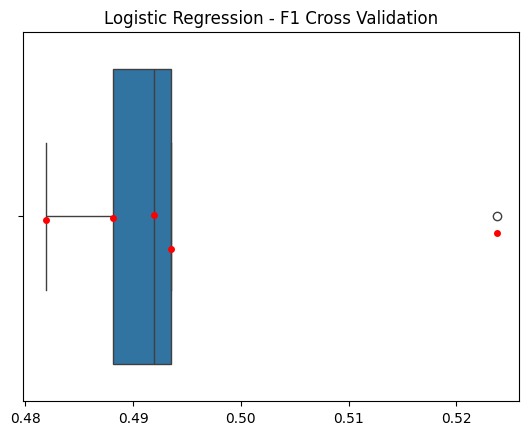

In [76]:
print('Mean :', round(scores.mean(), 3))
print('STD :', round(scores.std(), 3))

sns.boxplot(x=scores, orient='h')
sns.stripplot(x=scores, color='red')
plt.title('Logistic Regression - F1 Cross Validation')
plt.show()

#### Evaluation

In [77]:
y_train_pred = model.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      6370
           1       0.39      0.69      0.49      1630

    accuracy                           0.71      8000
   macro avg       0.64      0.70      0.65      8000
weighted avg       0.80      0.71      0.74      8000



In [78]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1593
           1       0.38      0.71      0.50       407

    accuracy                           0.71      2000
   macro avg       0.64      0.71      0.65      2000
weighted avg       0.80      0.71      0.74      2000



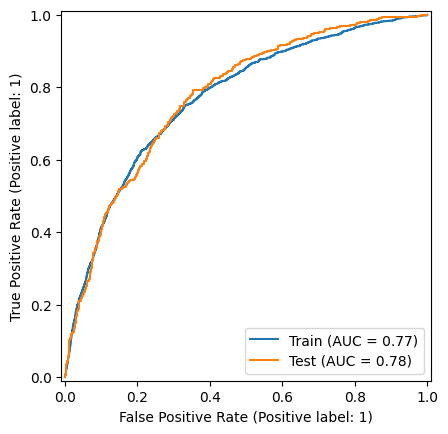

In [79]:
auc_train = RocCurveDisplay.from_estimator(
  model,
  X_train,
  y_train,
  name='Train',
)

RocCurveDisplay.from_estimator(
  model,
  X_test,
  y_test,
  name='Test',
  ax=auc_train.ax_,
)

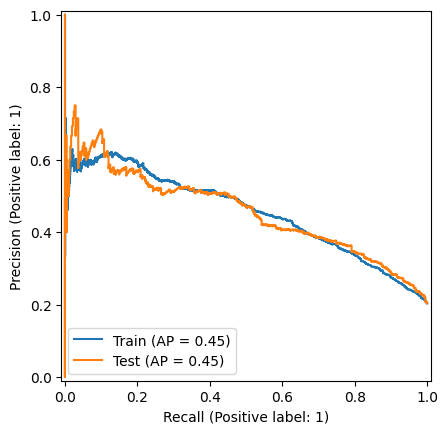

In [80]:
auc_train = PrecisionRecallDisplay.from_estimator(
  model,
  X_train,
  y_train,
  name='Train',
)

PrecisionRecallDisplay.from_estimator(
  model,
  X_test,
  y_test,
  name='Test',
  ax=auc_train.ax_,
)

#### Interpretation

In [81]:
df_feature = pd.DataFrame({
  'feature': X_train.columns,
  'coef': model.coef_[0],
  'coef_abs': abs(model.coef_[0]),
})

df_feature.sort_values('coef_abs', ascending=False)

,feature,coef,coef_abs
1,age,0.932536,0.932536
6,active_member,-0.869928,0.869928
10,country_Germany,0.624160,0.624160
8,gender_encoded,-0.561309,0.561309
3,balance,0.402290,0.402290
0,credit_score,-0.109820,0.109820
11,country_Spain,-0.104960,0.104960
9,country_France,-0.104703,0.104703
4,products_number,-0.101497,0.101497
5,credit_card,-0.086375,0.086375


#### Decision tree

In [82]:
model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=None,
    class_weight='balanced',
    random_state=11
)

model.fit(X_train, y_train)

scores = cross_val_score(
    model,
    X_train,
    y_train,
    cv=5,
    scoring='f1'
)

Decision Tree
Mean : 0.491
STD  : 0.021


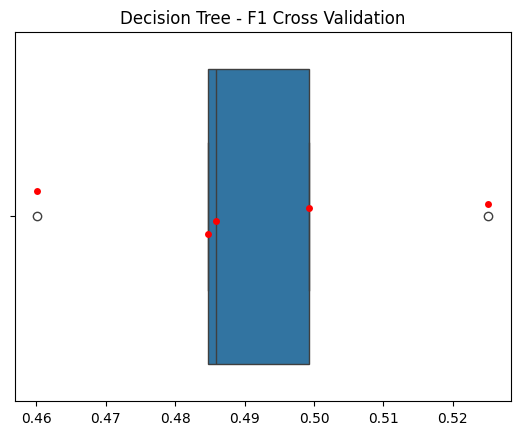

In [83]:
print("Decision Tree")
print("Mean :", round(scores.mean(), 3))
print("STD  :", round(scores.std(), 3))

sns.boxplot(x=scores, orient='h')
sns.stripplot(x=scores, color='red')
plt.title("Decision Tree - F1 Cross Validation")
plt.show()

#### Evaluation

In [84]:
y_train_pred = model.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       1.00      1.00      1.00      1630

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



In [85]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1593
           1       0.50      0.50      0.50       407

    accuracy                           0.80      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.80      0.80      0.80      2000



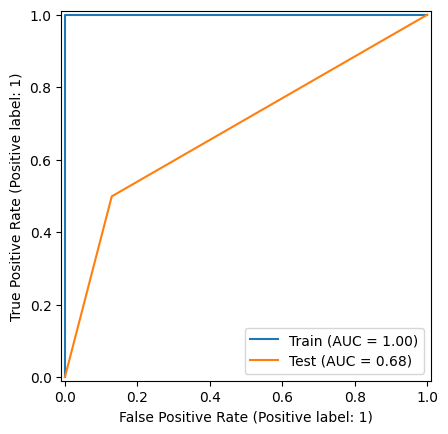

In [86]:
auc_train = RocCurveDisplay.from_estimator(
  model,
  X_train,
  y_train,
  name='Train',
)

RocCurveDisplay.from_estimator(
  model,
  X_test,
  y_test,
  name='Test',
  ax=auc_train.ax_,
)

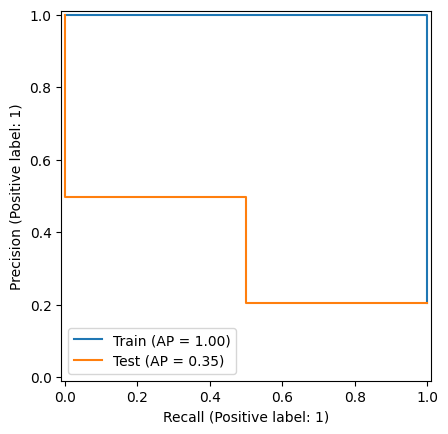

In [87]:
auc_train = PrecisionRecallDisplay.from_estimator(
  model,
  X_train,
  y_train,
  name='Train',
)

PrecisionRecallDisplay.from_estimator(
  model,
  X_test,
  y_test,
  name='Test',
  ax=auc_train.ax_,
)

#### SVM RBF

In [88]:
from sklearn.svm import SVC

model = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    class_weight='balanced',
    random_state=11
)

model.fit(X_train, y_train)

scores = cross_val_score(
    model,
    X_train,
    y_train,
    cv=5,
    scoring='f1'
)

SVM (RBF)
Mean : 0.596
STD  : 0.012


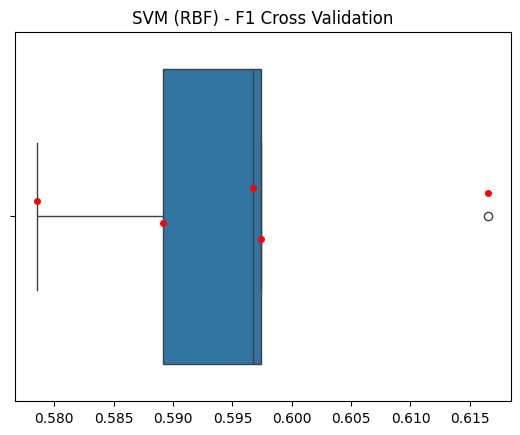

In [89]:
print("SVM (RBF)")
print("Mean :", round(scores.mean(), 3))
print("STD  :", round(scores.std(), 3))

sns.boxplot(x=scores, orient='h')
sns.stripplot(x=scores, color='red')
plt.title("SVM (RBF) - F1 Cross Validation")
plt.show()

#### Evaluation

In [90]:
y_train_pred = model.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      6370
           1       0.54      0.78      0.64      1630

    accuracy                           0.82      8000
   macro avg       0.74      0.80      0.76      8000
weighted avg       0.86      0.82      0.83      8000



In [91]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.81      0.86      1593
           1       0.50      0.76      0.60       407

    accuracy                           0.80      2000
   macro avg       0.72      0.78      0.73      2000
weighted avg       0.84      0.80      0.81      2000



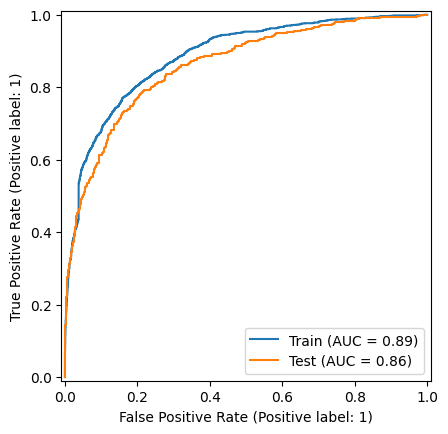

In [92]:
auc_train = RocCurveDisplay.from_estimator(
  model,
  X_train,
  y_train,
  name='Train',
)

RocCurveDisplay.from_estimator(
  model,
  X_test,
  y_test,
  name='Test',
  ax=auc_train.ax_,
)

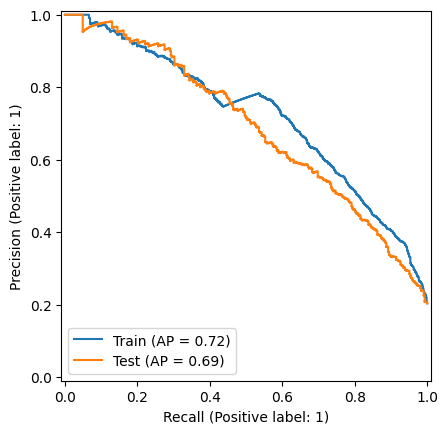

In [93]:
auc_train = PrecisionRecallDisplay.from_estimator(
  model,
  X_train,
  y_train,
  name='Train',
)

PrecisionRecallDisplay.from_estimator(
  model,
  X_test,
  y_test,
  name='Test',
  ax=auc_train.ax_,
)

#### KNN

In [94]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(
    n_neighbors=5,
    metric='minkowski',
    weights='uniform'    # opsi 'distance' / 'uniform'
)

model.fit(X_train, y_train)

scores = cross_val_score(
    model,
    X_train,
    y_train,
    cv=5,
    scoring='f1'
)

K-Nearest Neighbors (KNN)
Mean : 0.49
STD  : 0.024


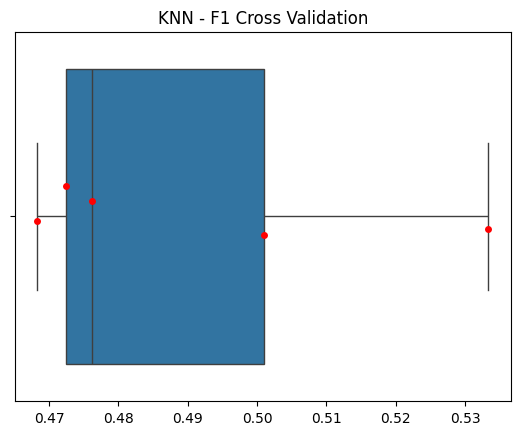

In [95]:
print("K-Nearest Neighbors (KNN)")
print("Mean :", round(scores.mean(), 3))
print("STD  :", round(scores.std(), 3))

sns.boxplot(x=scores, orient='h')
sns.stripplot(x=scores, color='red')
plt.title("KNN - F1 Cross Validation")
plt.show()

#### Evaluation

In [96]:
y_train_pred = model.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6370
           1       0.80      0.52      0.63      1630

    accuracy                           0.88      8000
   macro avg       0.85      0.75      0.78      8000
weighted avg       0.87      0.88      0.87      8000



In [97]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1593
           1       0.62      0.41      0.50       407

    accuracy                           0.83      2000
   macro avg       0.74      0.67      0.70      2000
weighted avg       0.81      0.83      0.82      2000



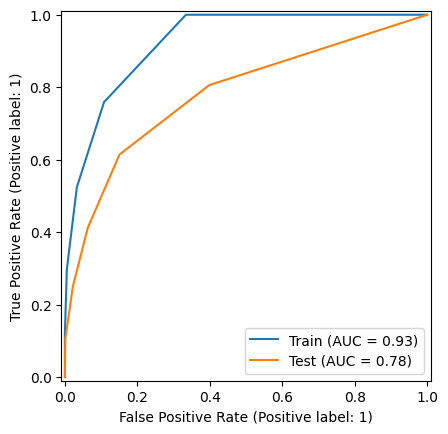

In [98]:
auc_train = RocCurveDisplay.from_estimator(
  model,
  X_train,
  y_train,
  name='Train',
)

RocCurveDisplay.from_estimator(
  model,
  X_test,
  y_test,
  name='Test',
  ax=auc_train.ax_,
)

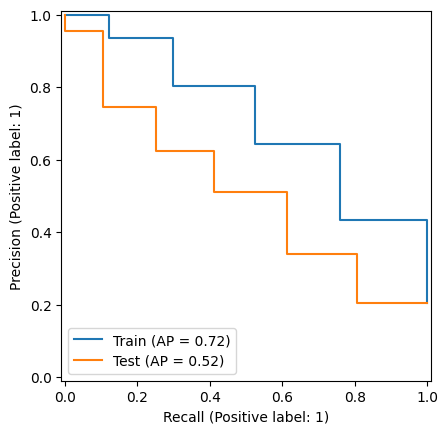

In [99]:
auc_train = PrecisionRecallDisplay.from_estimator(
  model,
  X_train,
  y_train,
  name='Train',
)

PrecisionRecallDisplay.from_estimator(
  model,
  X_test,
  y_test,
  name='Test',
  ax=auc_train.ax_,
)

### interpretasi

***Performa model memprediksi nilai churn = 1
fokus pada recal (kemampuan model menangkap prediksi nasabah yang benar-benar churn)***

---

Logistic Regression
- recall = data train 0.69 vs data test 0.71

---
Decision tree
- recall = data train 1.00 vs data test 0.50 (overfitting)

---
SVM RBF
- recall = data train 0.78 vs data test 0.76

---
KNN
- recall = data train 0.52 vs data test 0.41 (lemah menangkap churn)


**kesimpulan:**

**SVM RBF adalah model terbaik karena nilai recal pada data test 0.76 (tertinggi dari model yang lain), juga gap train-test kecil menandakan model stabil tidak overfitting.**




### Assignment Profitable :
1. Lakukan perhitungan profitable dengan asumsi biaya yang anda buat sendiri.

In [100]:
'''
N = jumlah nasabah dalam periode
r = proporsi/rasio nasabah yang churn (dari data: 20.37% → 0.2037)
ARPU (average revenue per user) per periode = Rp 1.000.000 / tahun
Margin profit (laba kotor per customer per period) = 30% dari ARPU → M = 0.3
Cost to retain one customer (mis. promo, diskon, personal outreach) = Rp 200.000 → C_ret
rec = recal model
prec = precision model
s = persentase nasabah yang diselamatkan dari churn setelah di intervensi
Lifetime horizon: kita bisa fokus satu periode (1 tahun)
'''

# contoh fungsi simulasi
def simulate_retention(N=10000, r=0.2037, ARPU=1_000_000, M=0.3,
                       C_ret=200_000, rec=0.7, prec=0.5, s=0.5):
    N_churn = N * r
    TP = rec * N_churn
    P_pred = TP / prec if prec>0 else TP  # avoid div zero
    FP = P_pred - TP
    saved = TP * s

    revenue_saved = saved * ARPU * M
    retention_cost = P_pred * C_ret
    net_benefit = revenue_saved - retention_cost
    roi = None
    if retention_cost != 0:
        roi = net_benefit / retention_cost

    return {
        'N': N,
        'N_churn': N_churn,
        'TP': TP,
        'FP': FP,
        'saved': saved,
        'revenue_saved': revenue_saved,
        'retention_cost': retention_cost,
        'net_benefit': net_benefit,
        'roi': roi
    }


res = simulate_retention()
for k,v in res.items():
    if isinstance(v, float):
        print(k, f"{v:,.2f}")
    else:
        print(k, v)

N 10000
N_churn 2,037.00
TP 1,425.90
FP 1,425.90
saved 712.95
revenue_saved 213,885,000.00
retention_cost 570,360,000.00
net_benefit -356,475,000.00
roi -0.62


Model dengan recall 0.7 dan precision 0.5 ini masih belum efisien.
Karena meskipun cukup banyak churn yang terdeteksi (recall tinggi), terlalu banyak pelanggan non-churn yang juga ikut diintervensi (precision rendah). Akibatnya biaya retention membengkak.

Biaya program lebih besar dari manfaatnya.
Rp 570 juta dikeluarkan, tapi hanya Rp 213 juta keuntungan yang diselamatkan → rugi Rp 356 juta.

ROI negatif (-0.62) artinya untuk setiap Rp 1 yang dikeluarkan untuk program retention, perusahaan kehilangan Rp 0.62.

In [101]:
#tambahkan cell jika diperlukan

## Notes :
Kumpulkan di LMS link google collab yang sudah dibuka aksesnya + sudah di run dan save output codenya. Serta jangan di private